<a href="https://colab.research.google.com/github/salexashenko/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [21]:
def prob_drunk_given_positive(prob_drunk, prob_positive, prob_positive_drunk):
 return(prob_positive_drunk*prob_drunk/prob_positive)

print (prob_drunk_given_positive(.001,.08,1)) #Original parameters
print (prob_drunk_given_positive(.001,.08,.95))
print (prob_drunk_given_positive(.002,.08,.8))

0.0125
0.011875
0.02


Text(0, 0.5, 'Certainty')

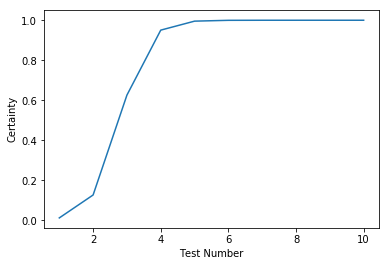

In [31]:
def prob_drunk_given_positive_accuracy(prob_drunk_prior, positive_accuracy):
  return (positive_accuracy * prob_drunk_prior) / ((positive_accuracy * prob_drunk_prior) + ((1.0-positive_accuracy) * (1.0-prob_drunk_prior)))
prior_drunk = [.0125]
positive_accuracy = .92
for _ in range(9):
   prior_drunk.append(prob_drunk_given_positive_accuracy(prior_drunk[-1], positive_acc))
import matplotlib.pyplot as plt
x_labels=[1,2,3,4,5,6,7,8,9,10]
prior_drunk
plt.plot(x_labels,prior_drunk)
plt.xlabel("Test Number")
plt.ylabel("Certainty")

In [0]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
!unzip LoanStats_2018Q4.csv.zip
!head LoanStats_2018Q4.csv
import pandas as pd
df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df=df.drop(columns=['id','desc','member_id','url'])
df.isna().sum().sort_values(ascending = False)
def depercentify(s):
  s=s[:-1]
  i=float(s)
  return i
df['int_rate'] = df['int_rate'].apply(depercentify)
import numpy as np
examples = ['owner','Supervisor',' Project Manager',np.NaN]
def clean_title(title):
  if(isinstance(title, float)):
    return "Unknown"
  else:
    title=title.strip()
    title=title.title()
    return title
df['emp_title'] = df['emp_title'].apply(clean_title)
df['emp_title_manager'] = True
df['emp_title_manager'] = df['emp_title'].str.contains('Manager')

--2019-09-16 16:28:35--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                 <=>]  21.58M   908KB/s    in 25s     

2019-09-16 16:29:00 (900 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22631049]

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    
Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


In [0]:
from scipy.stats import bayes_mvs
bayes_mvs(df['loan_amnt'])

(Mean(statistic=15971.32102139987, minmax=(15924.729676913774, 16017.912365885966)),
 Variance(statistic=103029497.73061347, minmax=(102360690.3883336, 103698305.07289334)),
 Std_dev(statistic=10150.344709940322, minmax=(10117.399654309605, 10183.289765571039)))

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
sns.set(style='ticks', palette='Set2')
dice_rolls=[]
for _ in range(100):
  dice_rolls.append(random.choice([1,2,3,4,5,6]))
dice_rolls

[6,
 5,
 3,
 4,
 3,
 2,
 2,
 3,
 3,
 4,
 5,
 6,
 6,
 6,
 2,
 1,
 1,
 1,
 3,
 1,
 5,
 1,
 2,
 3,
 5,
 2,
 6,
 4,
 6,
 4,
 1,
 1,
 2,
 1,
 5,
 3,
 4,
 2,
 3,
 5,
 2,
 1,
 3,
 2,
 4,
 3,
 5,
 2,
 1,
 5,
 6,
 1,
 4,
 1,
 6,
 2,
 6,
 1,
 5,
 2,
 1,
 6,
 3,
 4,
 2,
 1,
 1,
 2,
 1,
 1,
 6,
 1,
 2,
 5,
 2,
 5,
 6,
 3,
 1,
 5,
 2,
 6,
 2,
 6,
 4,
 1,
 4,
 2,
 2,
 6,
 2,
 4,
 6,
 5,
 1,
 6,
 1,
 6,
 4,
 6]

(array([23.,  0., 21.,  0., 12.,  0., 12.,  0., 13., 19.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

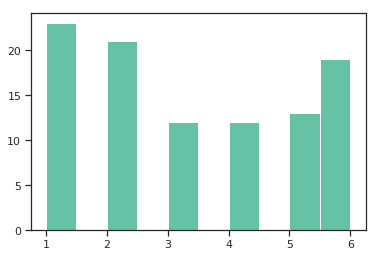

In [0]:
plt.hist(dice_rolls)

In [0]:
dice_probabilities_observed=[]
dice_probabilities_observed.append(dice_rolls.count(1)/len(dice_rolls))
dice_probabilities_observed.append(dice_rolls.count(2)/len(dice_rolls))
dice_probabilities_observed.append(dice_rolls.count(3)/len(dice_rolls))
dice_probabilities_observed.append(dice_rolls.count(4)/len(dice_rolls))
dice_probabilities_observed.append(dice_rolls.count(5)/len(dice_rolls))
dice_probabilities_observed.append(dice_rolls.count(6)/len(dice_rolls))

In [0]:
dice_probabilities_observed

[0.23, 0.21, 0.12, 0.12, 0.13, 0.19]

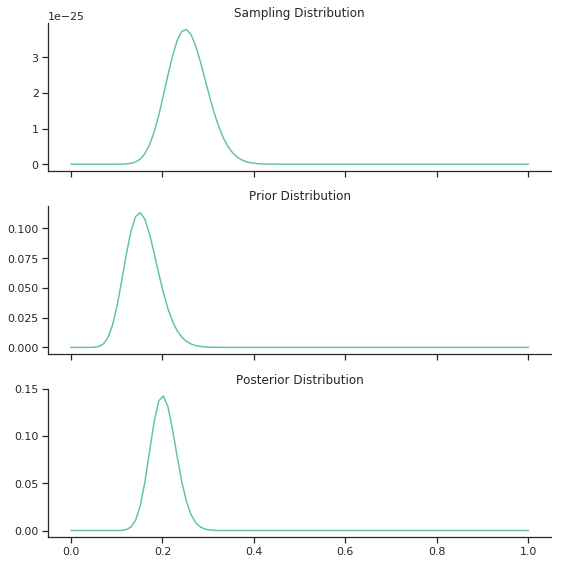

In [0]:
import numpy as np
import scipy.stats as st
#Using our sample as the true_p
def bern_post(n_params=100, n_sample=100, true_p=.23, prior_p=.17, n_prior=100):
    params = np.linspace(0, 1, n_params)
    sample = np.random.binomial(n=1, p=true_p, size=n_sample)
    likelihood = np.array([np.product(st.bernoulli.pmf(sample, p)) for p in params])
    #likelihood = likelihood / np.sum(likelihood)
    prior_sample = np.random.binomial(n=1, p=prior_p, size=n_prior)
    prior = np.array([np.product(st.bernoulli.pmf(prior_sample, p)) for p in params])
    prior = prior / np.sum(prior)
    posterior = [prior[i] * likelihood[i] for i in range(prior.shape[0])]
    posterior = posterior / np.sum(posterior)
     
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,8))
    axes[0].plot(params, likelihood)
    axes[0].set_title("Sampling Distribution")
    axes[1].plot(params, prior)
    axes[1].set_title("Prior Distribution")
    axes[2].plot(params, posterior)
    axes[2].set_title("Posterior Distribution")
    sns.despine()
    plt.tight_layout()
     
    return posterior
example_post = bern_post()

Because of this we can see that if we take our priors (fair dice) into account, our posterior distribution is closer to the predicted mean than our observed sample.

Frequentist approach only takes into account the data points in our sample. Bayesian approach also incorporates our prior knowlesge about the population.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)